#VISUALISATION
###IMPORTING PACKAGES FOR VISUALISATION

In [ ]:
#importing necessary packages 
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

###IMPORTING DATASET

In [ ]:
#To upload CSV file from device
from google.colab import files
data_to_load = files.upload()


Saving fp.csv to fp.csv


###LOADING DATASET

In [ ]:
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m' )
dataset = pd.read_csv('fp.csv',  parse_dates = [['year', 'month']], index_col=0, date_parser=parse)

# manually specify column names
dataset.columns = ['energy_used', 'mean_temp', 'max_temp','min_temp','vapor_pressure','rain_days','cloud_cover','population','electricity_price', 'cpi']
#setting index
dataset.index.name = 'month'
# mark all NA values with 0
dataset['energy_used'].fillna(0, inplace=True)
# summarize first 5 rows
print(dataset.head(5))

            energy_used  mean_temp  ...  electricity_price   cpi
month                               ...                         
1973-01-01     1957.641       17.0  ...                2.9  36.5
1973-02-01     1712.143       20.0  ...                2.9  36.7
1973-03-01     1510.079       23.2  ...                2.8  36.9
1973-04-01     1183.421       28.5  ...                2.9  37.1
1973-05-01     1006.326       30.0  ...                2.8  37.1

[5 rows x 10 columns]


###PLOTTING TOTAL DATASET

In [ ]:
dataset.info()
 
dataset.isnull().sum()

dataset.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 1973-01-01 to 2014-12-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   energy_used        504 non-null    float64
 1   mean_temp          504 non-null    float64
 2   max_temp           504 non-null    float64
 3   min_temp           504 non-null    float64
 4   vapor_pressure     504 non-null    float64
 5   rain_days          504 non-null    float64
 6   cloud_cover        504 non-null    float64
 7   population         504 non-null    int64  
 8   electricity_price  504 non-null    float64
 9   cpi                504 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 43.3 KB


count           mean  ...         75%         max
energy_used        504.0    1523.147333  ...    1779.560    2808.419
mean_temp          504.0      23.980357  ...      27.100      30.200
max_temp           504.0      15.232143  ...      24.050      29.200
min_temp           504.0       2.688889  ...      10.900      15.700
vapor_pressure     504.0       9.361706  ...      13.525      18.100
rain_days          504.0       9.047619  ...      13.425      19.300
cloud_cover        504.0      60.291071  ...      63.800      70.600
population         504.0  263593.811508  ...  293164.750  319742.000
electricity_price  504.0       7.941766  ...       9.055      13.090
cpi                504.0     123.938438  ...     146.525     217.930

[10 rows x 8 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mc= MinMaxScaler()
scaled_data = mc.fit_transform(dataset)

In [ ]:
scaled_data = pd.DataFrame(scaled_data,columns=['energy_used', 'mean_temp', 'max_temp','min_temp','vapor_pressure','rain_days','cloud_cover','population','electricity_price', 'cpi'])
scaled_data.head()

energy_used  mean_temp  max_temp  ...  population  electricity_price       cpi
0     0.553800   0.083333  0.075163  ...    0.000000           0.028599  0.000000
1     0.425046   0.291667  0.176471  ...    0.001233           0.028599  0.001102
2     0.319071   0.513889  0.339869  ...    0.002613           0.019066  0.002205
3     0.147752   0.881944  0.473856  ...    0.004103           0.028599  0.003307
4     0.054872   0.986111  0.692810  ...    0.005603           0.019066  0.003307

[5 rows x 10 columns]

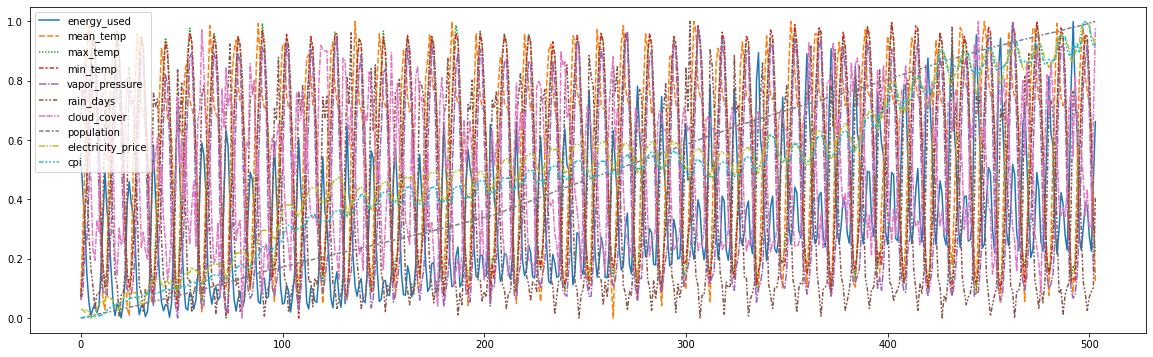

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data=scaled_data)

###SAVE AND DOWNLOAD DATASET

In [ ]:
# save to file
dataset.to_csv('FinalProject')
from google.colab import files
files.download('FinalProject') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###PLOTTING INDIVIDUAL FIELDS 

Text(0.5, 0, 'Month-Year')

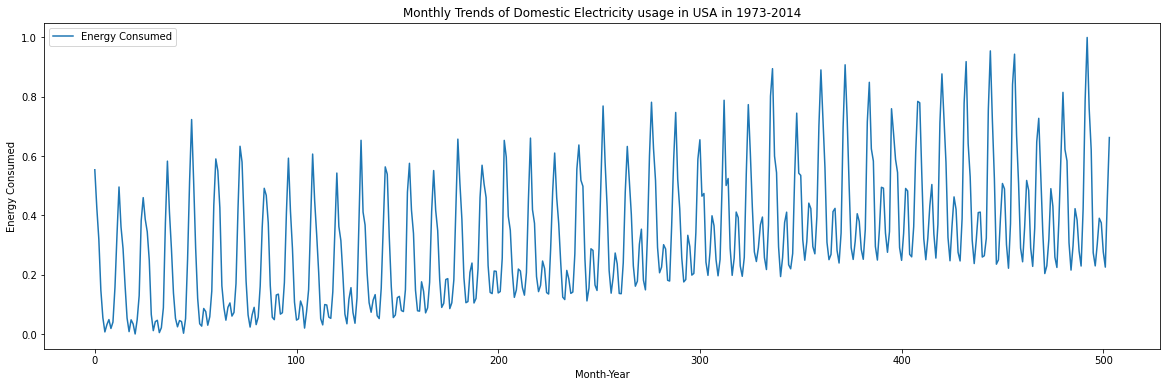

In [ ]:
# load dataset
df1 = dataset.copy()
dataset = scaled_data.copy()
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Monthly Trends of Domestic Electricity usage in USA in 1973-2014")
plt.ylabel('Energy Consumed')
# Line chart showing monthly trends of 'energy_used'
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed")

# Add label for horizontal axis
plt.xlabel("Month-Year")

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

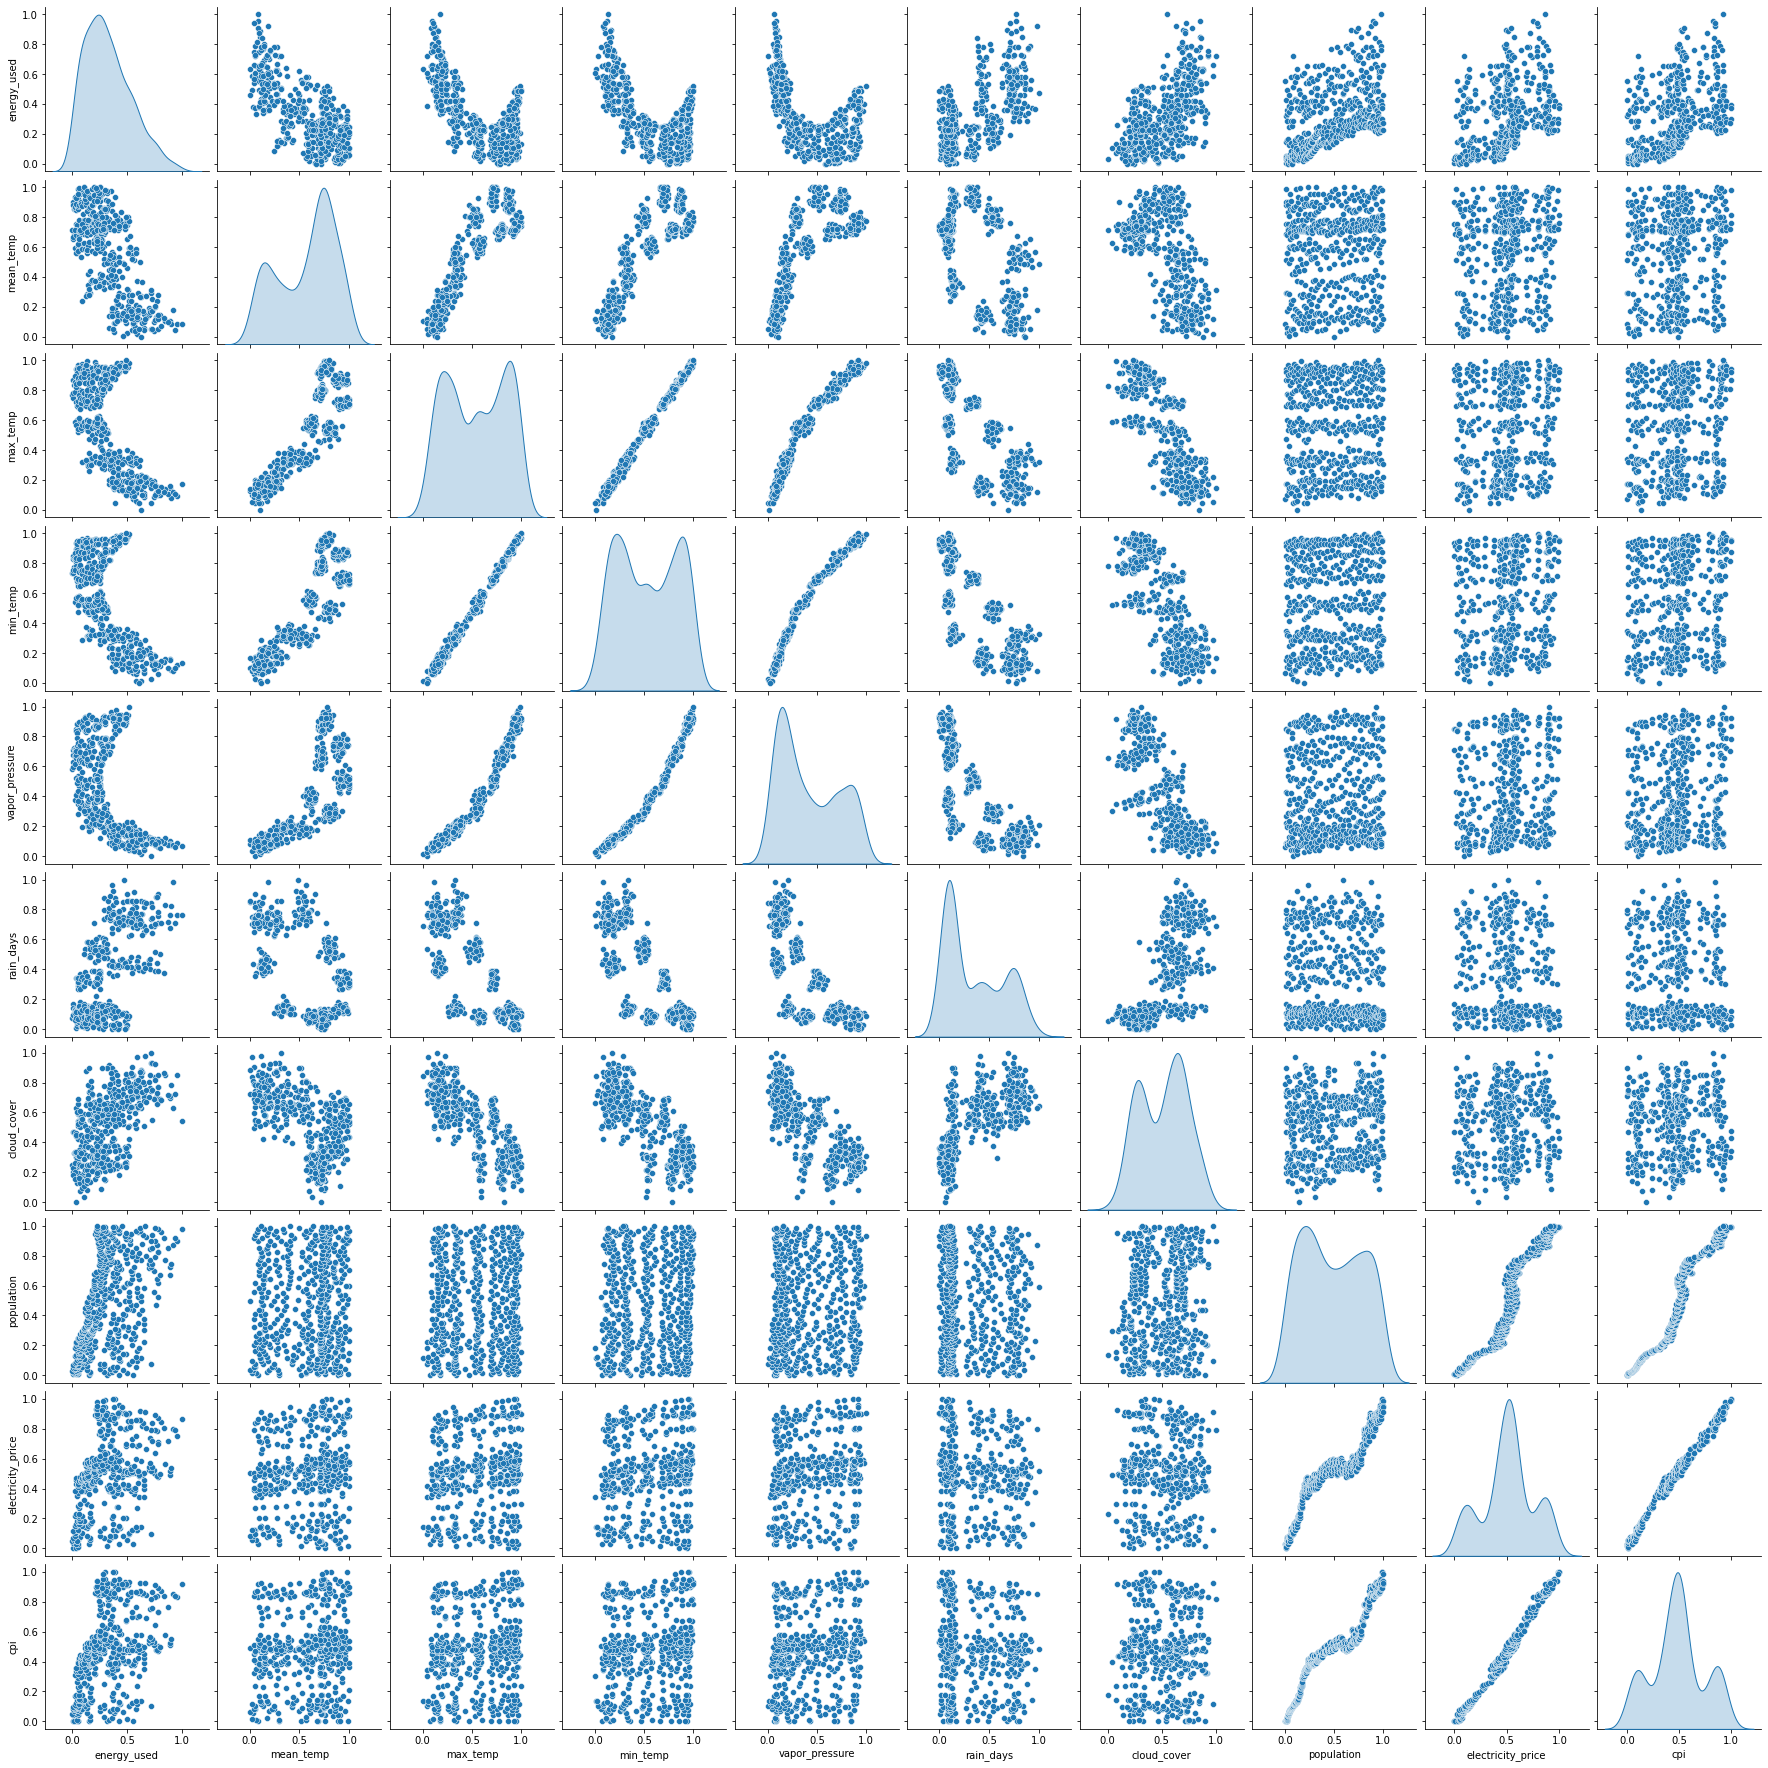

In [ ]:
#Have a quick look at the joint distribution of a few pairs of columns from the training set.
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.figure(figsize=(20,20))
sns.pairplot(dataset[['energy_used', 'mean_temp', 'max_temp','min_temp','vapor_pressure','rain_days','cloud_cover','population','electricity_price', 'cpi']], diag_kind='kde')

Text(0.5, 0, 'Month-Year')

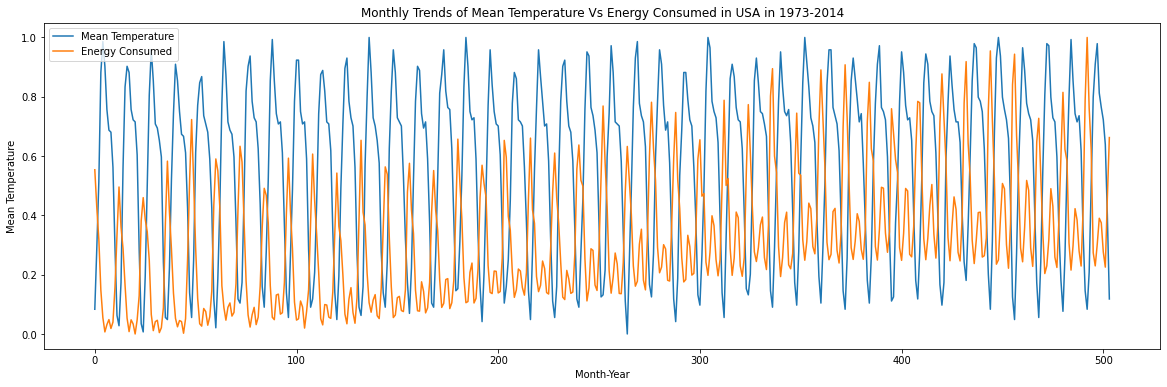

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Monthly Trends of Mean Temperature Vs Energy Consumed in USA in 1973-2014")
plt.ylabel('Mean Temperature')
# Line chart showing monthly trends of 'energy_used'
sns.lineplot(data=dataset['mean_temp'], label="Mean Temperature")
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed")
# Add label for horizontal axis
plt.xlabel("Month-Year")

Text(0.5, 0, 'Month-Year')

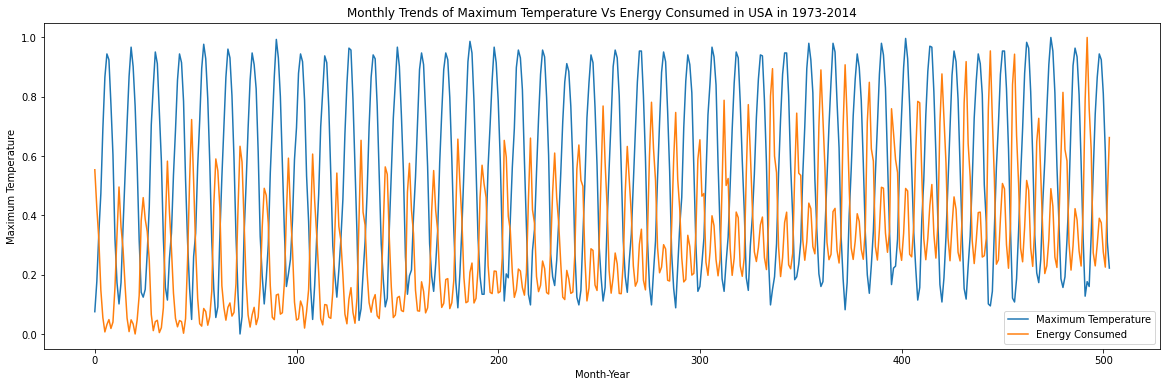

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Monthly Trends of Maximum Temperature Vs Energy Consumed in USA in 1973-2014")
plt.ylabel('Maximum Temperature')
# Line chart showing monthly trends of 'energy_used'
sns.lineplot(data=dataset['max_temp'], label="Maximum Temperature")
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed")
# Add label for horizontal axis
plt.xlabel("Month-Year")

Text(0.5, 0, 'Month-Year')

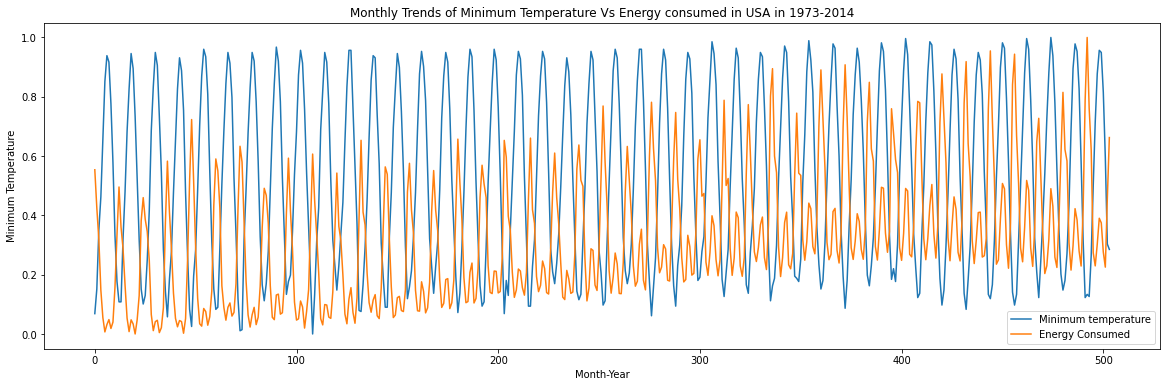

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Monthly Trends of Minimum Temperature Vs Energy consumed in USA in 1973-2014")
plt.ylabel('Minimum Temperature')
# Line chart showing monthly trends of 'energy_used'
sns.lineplot(data=dataset['min_temp'], label="Minimum temperature")
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed")
# Add label for horizontal axis
plt.xlabel("Month-Year")

Text(0.5, 0, 'Month-Year')

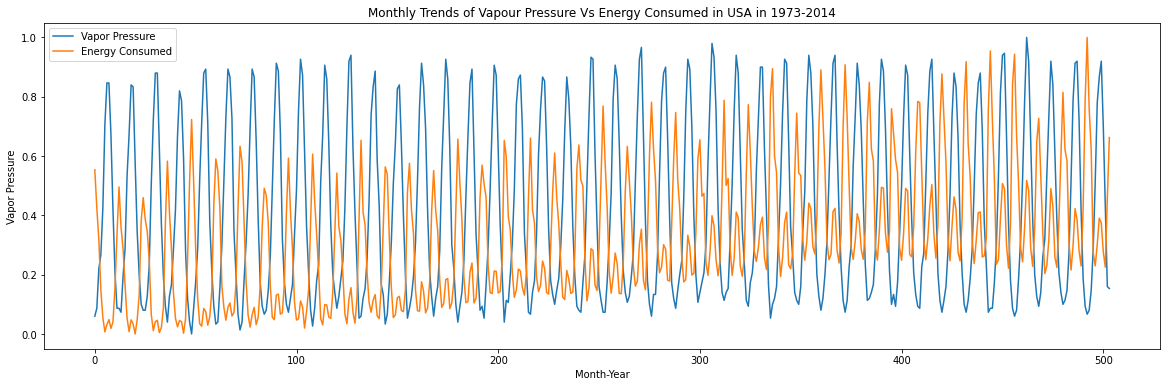

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Monthly Trends of Vapour Pressure Vs Energy Consumed in USA in 1973-2014")
plt.ylabel('Vapor Pressure')
# Line chart showing monthly trends of 'vapor_pressure'
sns.lineplot(data=dataset['vapor_pressure'], label="Vapor Pressure")
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed")
# Add label for horizontal axis
plt.xlabel("Month-Year")

Text(0.5, 0, 'Month-Year')

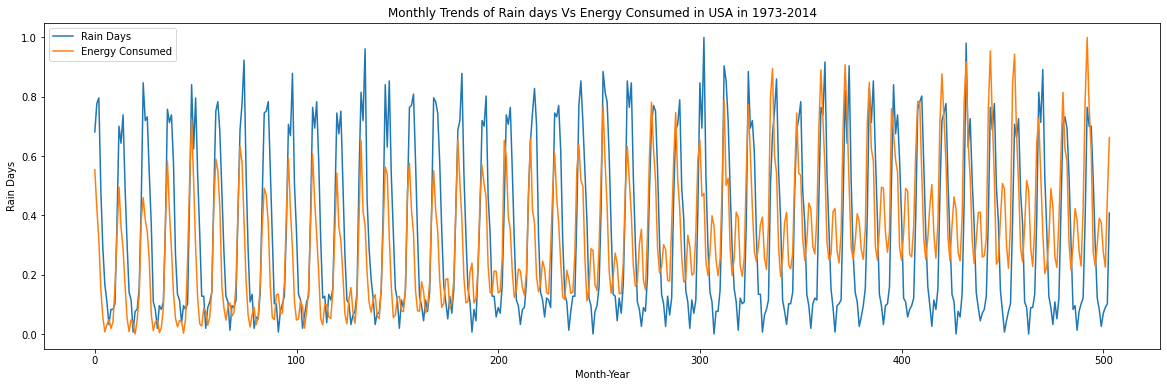

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Monthly Trends of Rain days Vs Energy Consumed in USA in 1973-2014")
plt.ylabel('Rain Days')
# Line chart showing monthly trends of 'energy_used'
sns.lineplot(data=dataset['rain_days'], label="Rain Days")
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed")
# Add label for horizontal axis
plt.xlabel("Month-Year")

Text(0.5, 0, 'Month-Year')

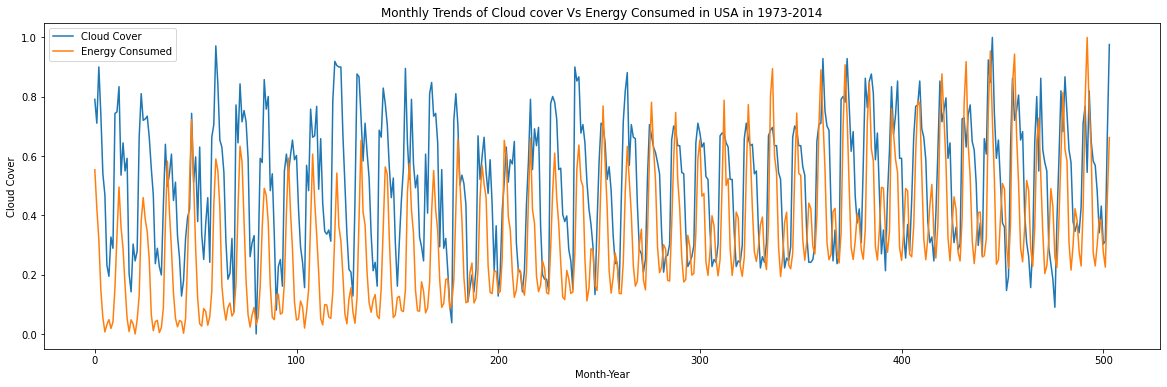

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Monthly Trends of Cloud cover Vs Energy Consumed in USA in 1973-2014")
plt.ylabel('Cloud Cover')
# Line chart showing monthly trends of 'energy_used'
sns.lineplot(data=dataset['cloud_cover'], label="Cloud Cover")
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed")
# Add label for horizontal axis
plt.xlabel("Month-Year")

Text(0.5, 0, 'Month-Year')

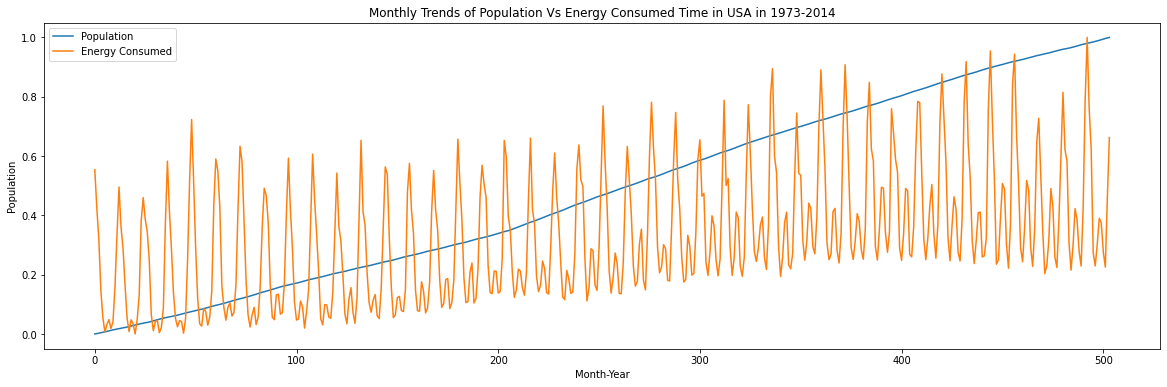

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))
 
# Add title
plt.title("Monthly Trends of Population Vs Energy Consumed Time in USA in 1973-2014")
plt.ylabel('Population') 
# Line chart showing monthly trends of 'energy_used'
sns.lineplot(data=dataset['population'], label="Population")
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed") 
# Add label for horizontal axis
plt.xlabel("Month-Year")

Text(0.5, 0, 'Month-Year')

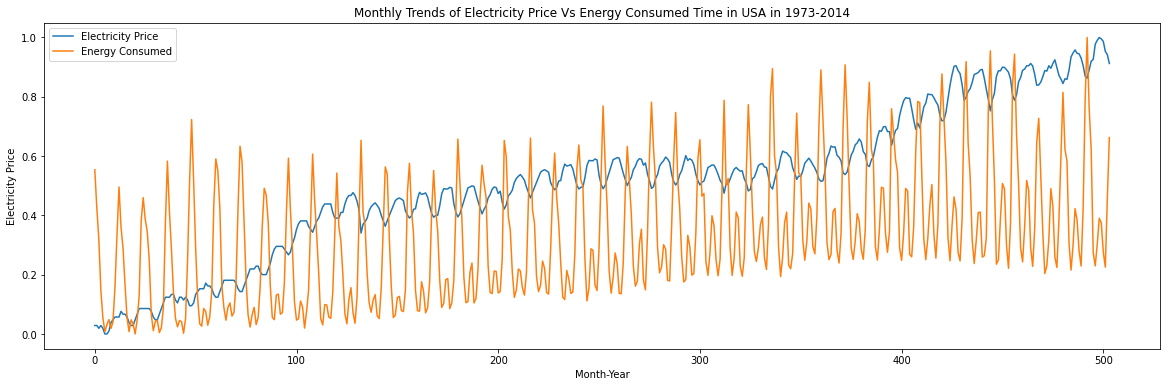

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Monthly Trends of Electricity Price Vs Energy Consumed Time in USA in 1973-2014")
plt.ylabel('Electricity Price')
# Line chart showing monthly trends of 'energy_used'
sns.lineplot(data=dataset['electricity_price'], label="Electricity Price")
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed")
# Add label for horizontal axis
plt.xlabel("Month-Year")

Text(0.5, 0, 'Month-Year')

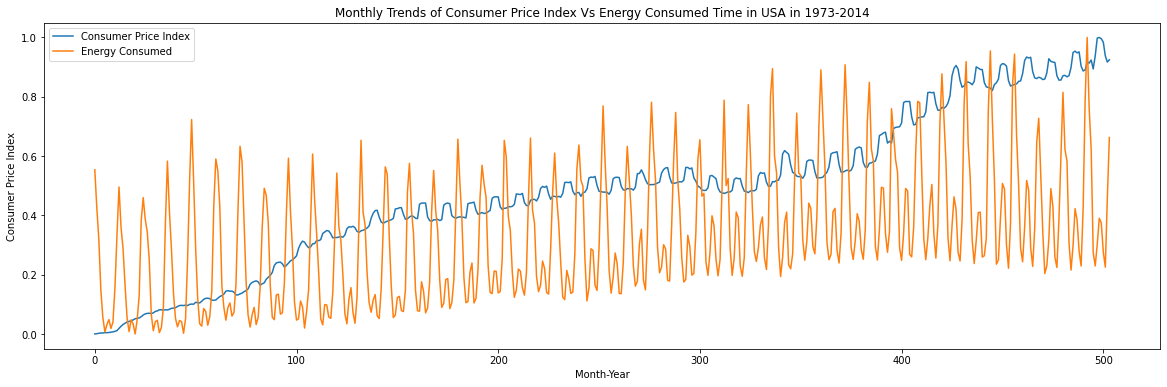

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))
 
# Add title
plt.title("Monthly Trends of Consumer Price Index Vs Energy Consumed Time in USA in 1973-2014")
plt.ylabel('Consumer Price Index') 
# Line chart showing monthly trends of 'energy_used'
sns.lineplot(data=dataset['cpi'], label="Consumer Price Index")
sns.lineplot(data=dataset['energy_used'], label="Energy Consumed") 
# Add label for horizontal axis
plt.xlabel("Month-Year")

In [ ]:
jan_data = df1.iloc[[12*x for x in range(0, int(506/12))]]
jan_data.head()
jan_data.shape


(42, 10)

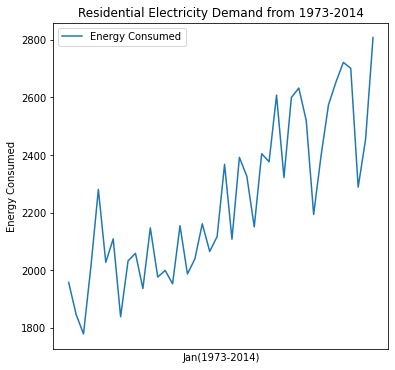

In [ ]:
plt.figure(figsize= (6,6))
plt.xlabel('Jan(1973-2014)')
plt.xticks([])
plt.ylabel('Energy Consumed')
plt.title('Residential Electricity Demand from 1973-2014')
sns.lineplot(data=jan_data['energy_used'], label="Energy Consumed")
